<a href="https://colab.research.google.com/github/Sourav-2510/Data-Science-and-Business-Analyst/blob/main/Mark_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mark Prediction

Mark prediction based on the data set which provides mark and the corresponding hours spend to study the subject using simple linear regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('http://bit.ly/w-data')
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###Defining dependent and independent variable
Here mark is dependent on the hours studied so mark is selected as dependent variable and y is selected as independent variable.

In [135]:
x= dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [136]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [137]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

###Plotting Scores against Hours

Text(0.5, 1.0, 'Hour-Mark Plot')

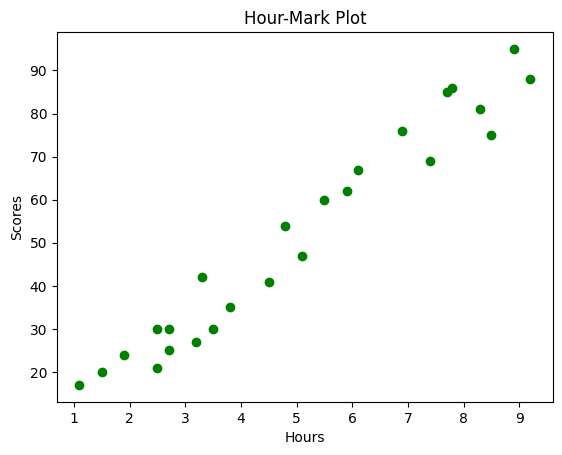

In [138]:
plt.scatter(x,y,color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hour-Mark Plot')


#Splitting data for training and testing

In [139]:
from sklearn.model_selection import train_test_split

training size is chosen as 75% and 25% data for testing

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [141]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (7, 1), (18,), (7,))

#Modeling 

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
model=LinearRegression()

In [144]:
model.fit(x_train,y_train)

LinearRegression()

In [145]:
x_pred=model.predict(x_train)

#Plotting Modeled Line

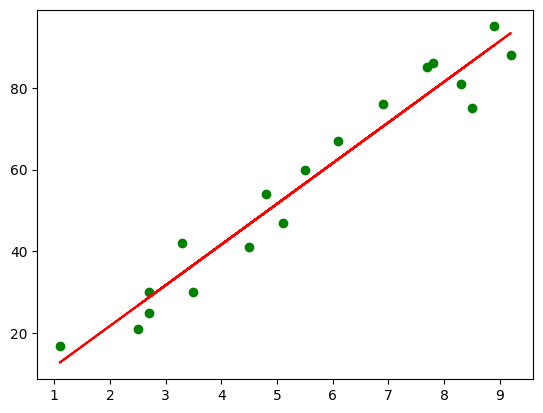

In [146]:
plt.plot(x_train,x_pred,color='red')
plt.scatter(x_train,y_train,color='green')

In [147]:
model.coef_

array([9.94167834])

In [148]:
model.intercept_

1.9322042531516601

#Testing the model

In [149]:
y_pred=model.predict(x_test)

In [150]:
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [151]:
y_test

array([20, 27, 69, 30, 62, 35, 24])

Plotting prediction results

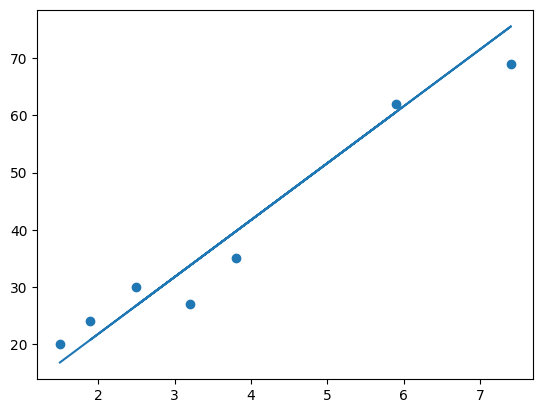

In [155]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [156]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#Prediction For Given Hours

In [167]:
x=([[9.25]])
new_pred=model.predict(x)

In [176]:
print('Hours:',x[0][0])
print('The Predicted Score is :',new_pred[0])

Hours: 9.25
The Predicted Score is : 93.89272889341652


#Evaluating the model

In [185]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,classification_report,r2_score

In [187]:
print('mean absolute error:',mean_absolute_error(y_test,y_pred))

mean absolute error: 4.130879918502482


In [188]:
print('mean absolute percentage  error:',mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage  error: 0.12839063502281337


In [190]:
print('Coefficient of determination :',r2_score(y_test,y_pred))

Coefficient of determination : 0.9367661043365056
